<a href="https://colab.research.google.com/github/IAMDSVSSANGRAL/UNSUPERVISEDALGO/blob/main/Netflix_moveis_and_TV_shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 - Samadhan Tangde

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Santa/clustering - capestone/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [4]:
data_raw = pd.read_csv(path)

In [5]:
data = data_raw.copy()

### Dataset First View

In [6]:
# Dataset First Look
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [7]:
data.shape

(7787, 12)

In [8]:
# Dataset Rows & Columns count
rows = print(f'The number of Rows in the data is',data.shape[0])
columns = print(f'The number of Columns in the data is',data.shape[1])

The number of Rows in the data is 7787
The number of Columns in the data is 12


### Dataset Information

In [9]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
data['show_id'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7782    False
7783    False
7784    False
7785    False
7786    False
Name: show_id, Length: 7787, dtype: bool

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

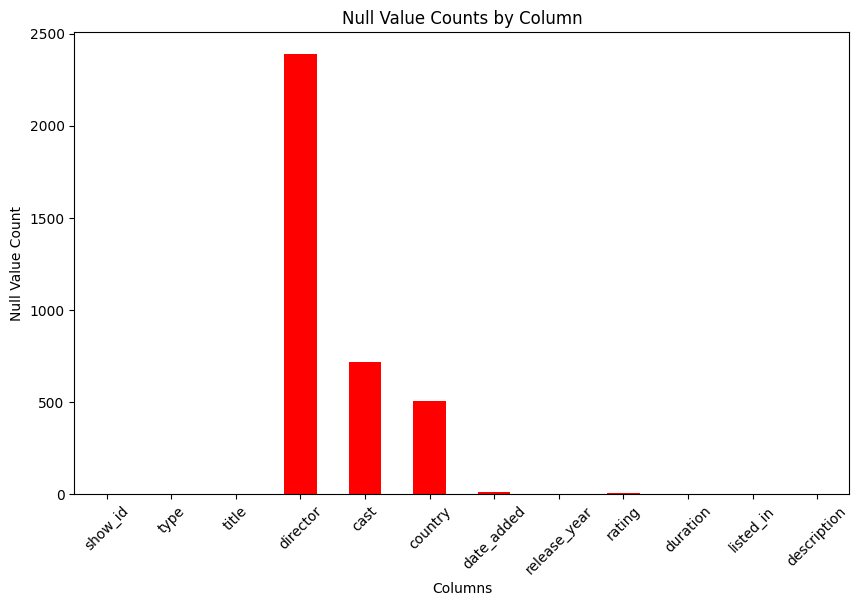

In [12]:
# Visualizing the missing values
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of null values in each column
null_counts = data.isnull().sum()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
null_counts.plot(kind='bar', color='red')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts by Column')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()


### What did you know about your dataset?

**show_id** : Unique ID for every Movie / Tv Show

**type** : Identifier - A Movie or TV Show

**title** : Title of the Movie / Tv Show

**director** : Director of the Movie

**cast** : Actors involved in the movie / show

**country **: Country where the movie / show was produced

**date_added** : Date it was added on Netflix

**release_year** : Actual Releaseyear of the movie / show

**rating** : TV Rating of the movie / show

**duration** : Total Duration - in minutes or number of seasons

**listed_in **: Genere

**description** : The Summary description

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
# Dataset Describe
data.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description

### Check Unique Values for each variable.

In [15]:
data['show_id'].unique()

array(['s1', 's2', 's3', ..., 's7785', 's7786', 's7787'], dtype=object)

In [16]:
# Checking Unique Values count for each variable.
for i in data.columns.tolist():
  print("The unique values in",i, "is",data[i].nunique(),".")


The unique values in show_id is 7787 .
The unique values in type is 2 .
The unique values in title is 7787 .
The unique values in director is 4049 .
The unique values in cast is 6831 .
The unique values in country is 681 .
The unique values in date_added is 1565 .
The unique values in release_year is 73 .
The unique values in rating is 14 .
The unique values in duration is 216 .
The unique values in listed_in is 492 .
The unique values in description is 7769 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Convert 'date_added' column to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Now, the 'date_added' column is in datetime format
print(data.dtypes)


show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object


In [18]:
# Extract month, day, and year features
data['added_month'] = data['date_added'].dt.month
data['added_day'] = data['date_added'].dt.day
data['added_year'] = data['date_added'].dt.year

In [19]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 25.9 MB/s eta 0:00:00


In [20]:
import sweetviz as sv

# Assuming 'concatenated_data' is your DataFrame
report = sv.analyze(data)

# To display the report in a Jupyter Notebook, use:
report.show_html('sweetviz_report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

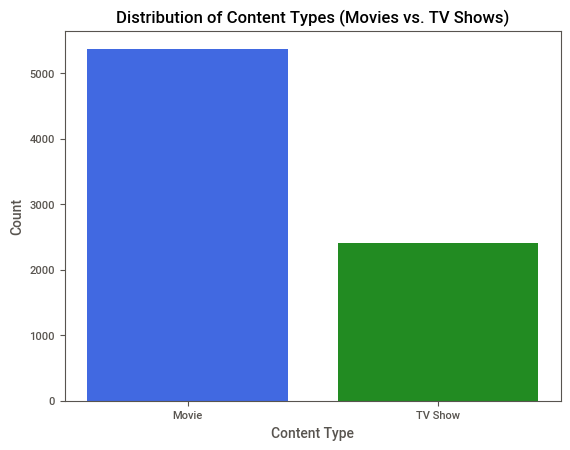

In [21]:
# Chart - 1 visualization code
# Create a bar plot for content types
content_type_counts = data['type'].value_counts()
# Specify colors for each content type
colors = ['royalblue', 'forestgreen']
plt.bar(content_type_counts.index, content_type_counts.values, color = colors)

# Add labels and title
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types (Movies vs. TV Shows)')

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

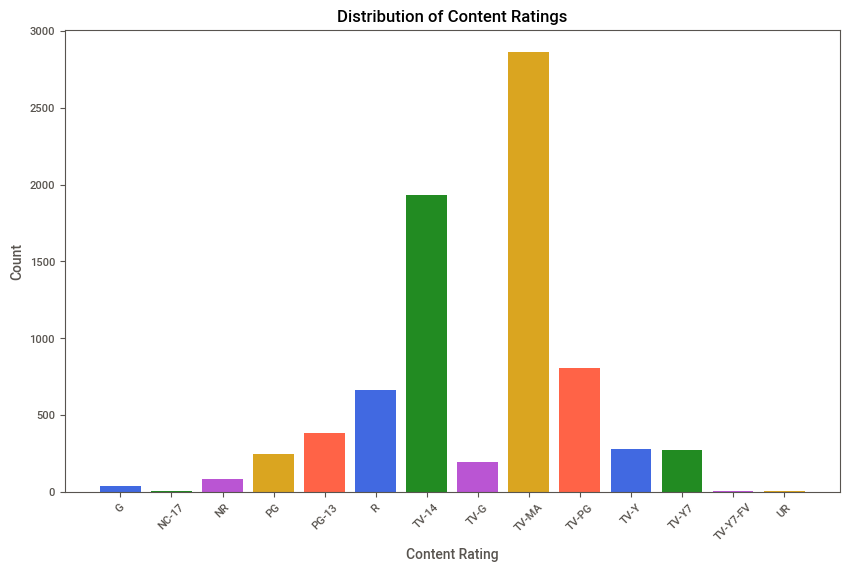

In [22]:
# Create a bar plot for content ratings
rating_counts = data['rating'].value_counts()
rating_counts = rating_counts.sort_index()  # Sort ratings in alphabetical order

# Define a list of 14 different random colors
colors = ['royalblue', 'forestgreen', 'mediumorchid', 'goldenrod', 'tomato']

plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values, color=colors)

# Add labels and title
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Distribution of Content Ratings')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [23]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [24]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [25]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [26]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [27]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [28]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [29]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [30]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [31]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [32]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [33]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [34]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [35]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   show_id          7770 non-null   object 
 1   title            7770 non-null   object 
 2   director         7770 non-null   object 
 3   cast             7770 non-null   object 
 4   listed_in        7770 non-null   object 
 5   description      7770 non-null   object 
 6   combined_text    7770 non-null   object 
 7   type_encoded     7770 non-null   int64  
 8   country_encoded  7770 non-null   int64  
 9   rating_encoded   7770 non-null   int64  
 10  seasons          7770 non-null   int64  
 11  minutes          7770 non-null   int64  
 12  added_month      7770 non-null   float64
 13  added_day        7770 non-null   float64
 14  added_year       7770 non-null   float64
dtypes: float64(3), int64(5), object(7)
memory usage: 1.2+ MB


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothesis 1: The Distribution of Movie Genres on Netflix Varies Between Countries

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the distribution of movie genres available on Netflix across different countries.

Alternative Hypothesis (H1): The distribution of movie genres available on Netflix varies significantly between different countries.

#### 2. Perform an appropriate statistical test.

In [155]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table using crosstab
contingency_table = pd.crosstab(data['rating_encoded'], data['country_encoded'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Define your significance level (alpha)
alpha = 0.05

# Compare the p-value to alpha
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between rating_encoded and country_encoded.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between rating_encoded and country_encoded.")

Reject the null hypothesis: There is a significant association between rating_encoded and country_encoded.


In [156]:
contingency_table

country_encoded  0   1   2   3   4   5   6   7   8   9   ...  64   65  66  \
rating_encoded                                           ...                
0                 0   0   0   0   0   0   0   0   0   1  ...   0    0   0   
1                 0   0   0   0   0   0   0   0   0   1  ...   0    0   0   
2                 2   2   0   0   0   1   2   0   0   2  ...   0    5   0   
3                 0   3   0   0   0   0   2   0   0   8  ...   0    2   0   
4                 0   1   0   0   0   0   1   0   0   3  ...   0    7   0   
5                 1   4   1   0   0   0   0   1   0  16  ...   0   31   0   
6                 7  12   1   1   0   1   8   0   0  23  ...   8   68   0   
7                 1   2   0   0   0   0   3   0   0  14  ...   1   21   0   
8                34  34   2   1   0   6  47   0   1  60  ...   0  167   1   
9                 3  13   0   0   0   0   6   0   0  22  ...   3   74   0   
10                2   8   0   0   1   0   3   0   0  17  ...   0   16   0   
11                0   2   0   0   0   0   0   0   0   9  ...   0    5   0   
12                0   0   0   0   0   0   0   0   0   1  ...   0    0   0   
13                0   0   0   0   0   0   0   0   0   0  ...   0    0   0   

country_encoded   67  68  69  70  71  72  73  
rating_encoded                                
0                 29   0   0   0   0   0   0  
1                  1   0   0   0   0   0   0  
2                 34   0   0   0   0   0   0  
3                144   0   0   0   0   0   0  
4                227   0   0   0   0   0   0  
5                364   0   0   0   0   0   0  
6                376   0   0   1   2   0   0  
7                 77   0   0   0   1   0   1  
8                879   1   1   0   2   1   0  
9                239   0   2   0   0   0   0  
10                81   0   0   0   0   0   0  
11                93   0   0   0   0   0   0  
12                 1   0   0   0   0   0   0  
13                 1   0   0   0   0   0   0  

[14 rows x 74 columns]

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothesis 2: Netflix Has Shown a Preference for Producing Original TV Shows Over Movies in Recent Years

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There has been no significant change in the ratio of TV shows to movies on Netflix over the years.

Alternative Hypothesis (H1): Netflix has significantly increased the ratio of TV shows to movies in its content library in recent years.


#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [39]:
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
added_month       10
added_day         10
added_year        10
dtype: int64

In [40]:
date =data[data['added_month'].isna()]
date

show_id     type                                        title director  \
258     s259  TV Show  A Young Doctor's Notebook and Other Stories      NaN   
549     s550  TV Show              Anthony Bourdain: Parts Unknown      NaN   
2263   s2264  TV Show                                      Frasier      NaN   
2288   s2289  TV Show                                      Friends      NaN   
2555   s2556  TV Show                              Gunslinger Girl      NaN   
3374   s3375  TV Show                                     Kikoriki      NaN   
3492   s3493  TV Show                          La Familia P. Luche      NaN   
3946   s3947  TV Show                                        Maron      NaN   
5137   s5138  TV Show                                 Red vs. Blue      NaN   
6065   s6066  TV Show                 The Adventures of Figaro Pho      NaN   

                                                   cast         country  \
258   Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...  United Kingdom   
549                                    Anthony Bourdain   United States   
2263  Kelsey Grammer, Jane Leeves, David Hyde Pierce...   United States   
2288  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   United States   
2555  Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...           Japan   
3374                                      Igor Dmitriev             NaN   
3492  Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...   United States   
3946  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   United States   
5137  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   United States   
6065  Luke Jurevicius, Craig Behenna, Charlotte Haml...       Australia   

     date_added  release_year rating    duration  \
258         NaT          2013  TV-MA   2 Seasons   
549         NaT          2018  TV-PG   5 Seasons   
2263        NaT          2003  TV-PG  11 Seasons   
2288        NaT          2003  TV-14  10 Seasons   
2555        NaT          2008  TV-14   2 Seasons   
3374        NaT          2010   TV-Y   2 Seasons   
3492        NaT          2012  TV-14   3 Seasons   
3946        NaT          2016  TV-MA   4 Seasons   
5137        NaT          2015     NR  13 Seasons   
6065        NaT          2015  TV-Y7   2 Seasons   

                                              listed_in  \
258            British TV Shows, TV Comedies, TV Dramas   
549                                          Docuseries   
2263                     Classic & Cult TV, TV Comedies   
2288                     Classic & Cult TV, TV Comedies   
2555                       Anime Series, Crime TV Shows   
3374                                           Kids' TV   
3492  International TV Shows, Spanish-Language TV Sh...   
3946                                        TV Comedies   
5137  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6065                              Kids' TV, TV Comedies   

                                            description  added_month  \
258   Set during the Russian Revolution, this comic ...          NaN   
549   This CNN original series has chef Anthony Bour...          NaN   
2263  Frasier Crane is a snooty but lovable Seattle ...          NaN   
2288  This hit sitcom follows the merry misadventure...          NaN   
2555  On the surface, the Social Welfare Agency appe...          NaN   
3374  A wacky rabbit and his gang of animal pals hav...          NaN   
3492  This irreverent sitcom featues Ludovico, Feder...          NaN   
3946  Marc Maron stars as Marc Maron, who interviews...          NaN   
5137  This parody of first-person shooter games, mil...          NaN   
6065  Imagine your worst fears, then multiply them: ...          NaN   

      added_day  added_year  
258         NaN         NaN  
549         NaN         NaN  
2263        NaN         NaN  
2288        NaN         NaN  
2555        NaN         NaN  
3374        NaN         NaN  
3492        NaN         NaN  
3946        NaN         NaN  
5137        NaN        

In [41]:
# Drop rows with the specified indices
data = data.drop(date.index)

In [42]:
x = data[data['rating'].isna()]
x

show_id     type                                              title  \
67       s68    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
2359   s2360  TV Show                  Gargantia on the Verdurous Planet   
3660   s3661  TV Show                                       Little Lunch   
3736   s3737    Movie                                    Louis C.K. 2017   
3737   s3738    Movie                              Louis C.K.: Hilarious   
3738   s3739    Movie               Louis C.K.: Live at the Comedy Store   
4323   s4324    Movie                               My Honor Was Loyalty   

             director                                               cast  \
67                NaN                        Oprah Winfrey, Ava DuVernay   
2359              NaN  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
3660              NaN  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
3736       Louis C.K.                                         Louis C.K.   
3737       Louis C.K.                                         Louis C.K.   
3738       Louis C.K.                                         Louis C.K.   
4323  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

            country date_added  release_year rating  duration  \
67              NaN 2017-01-26          2017    NaN    37 min   
2359          Japan 2016-12-01          2013    NaN  1 Season   
3660      Australia 2018-02-01          2015    NaN  1 Season   
3736  United States 2017-04-04          2017    NaN    74 min   
3737  United States 2016-09-16          2010    NaN    84 min   
3738  United States 2016-08-15          2015    NaN    66 min   
4323          Italy 2017-03-01          2015    NaN   115 min   

                                 listed_in  \
67                                  Movies   
2359  Anime Series, International TV Shows   
3660                 Kids' TV, TV Comedies   
3736                                Movies   
3737                                Movies   
3738                                Movies   
4323                                Dramas   

                                            description  added_month  \
67    Oprah Winfrey sits down with director Ava DuVe...          1.0   
2359  After falling through a wormhole, a space-dwel...         12.0   
3660  Adopting a child's perspective, this show take...          2.0   
3736  Louis C.K. muses on religion, eternal love, gi...          4.0   
3737  Emmy-winning comedy writer Louis C.K. brings h...          9.0   
3738  The comic puts his trademark hilarious/thought...          8.0   
4323  Amid the chaos and horror of World War II, a c...          3.0   

      added_day  added_year  
67         26.0      2017.0  
2359        1.0      2016.0  
3660        1.0      2018.0  
3736        4.0      2017.0  
3737       16.0      2016.0  
3738       15.0      2016.0  
4323        1.0      2017.0

In [43]:
# Drop rows with the specified indices
data = data.drop(x.index)

In [44]:
y = data[data['date_added'].isna()]
y

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description, added_month, added_day, added_year]
Index: []

In [45]:
# Drop rows with the specified indices
data = data.drop(y.index)

In [46]:
director_null = data[data['director'].isna()]
director_null.head(5)

show_id     type                                title director  \
0       s1  TV Show                                   3%      NaN   
11     s12  TV Show                                 1983      NaN   
16     s17  TV Show                               Feb-09      NaN   
19     s20    Movie                                  '89      NaN   
24     s25  TV Show  ​SAINT SEIYA: Knights of the Zodiac      NaN   

                                                 cast                country  \
0   João Miguel, Bianca Comparato, Michel Gomes, R...                 Brazil   
11  Robert Więckiewicz, Maciej Musiał, Michalina O...  Poland, United States   
16  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...                    NaN   
19                 Lee Dixon, Ian Wright, Paul Merson         United Kingdom   
24  Bryson Baugus, Emily Neves, Blake Shepard, Pat...                  Japan   

   date_added  release_year rating   duration  \
0  2020-08-14          2020  TV-MA  4 Seasons   
11 2018-11-30          2018  TV-MA   1 Season   
16 2019-03-20          2018  TV-14   1 Season   
19 2018-05-16          2017  TV-PG     87 min   
24 2020-01-23          2020  TV-14  2 Seasons   

                                            listed_in  \
0   International TV Shows, TV Dramas, TV Sci-Fi &...   
11  Crime TV Shows, International TV Shows, TV Dramas   
16                  International TV Shows, TV Dramas   
19                                      Sports Movies   
24               Anime Series, International TV Shows   

                                          description  added_month  added_day  \
0   In a future where the elite inhabit an island ...          8.0       14.0   
11  In this dark alt-history thriller, a naïve law...         11.0       30.0   
16  As a psychology professor faces Alzheimer's, h...          3.0       20.0   
19  Mixing old footage with interviews, this is th...          5.0       16.0   
24  Seiya and the Knights of the Zodiac rise again...          1.0       23.0   

    added_year  
0       2020.0  
11      2018.0  
16      2019.0  
19      2018.0  
24      2020.0

In [47]:
data['director'] = data['director'].fillna('Not Mention')

In [48]:
cast_null = data[data['cast'].isna()]
cast_null.head(5)

show_id     type             title                                director  \
12     s13  TV Show              1994                    Diego Enrique Osorno   
25     s26    Movie          (T)ERROR  Lyric R. Cabral, David Felix Sutcliffe   
26     s27  TV Show          (Un)Well                             Not Mention   
30     s31    Movie  #cats_the_mewvie                        Michael Margolis   
35     s36    Movie         #Rucker50                   Robert McCullough Jr.   

   cast        country date_added  release_year rating  duration  \
12  NaN         Mexico 2019-05-17          2019  TV-MA  1 Season   
25  NaN  United States 2016-06-30          2015     NR    84 min   
26  NaN  United States 2020-08-12          2020  TV-MA  1 Season   
30  NaN         Canada 2020-02-05          2020  TV-14    90 min   
35  NaN  United States 2016-12-01          2016  TV-PG    56 min   

                                            listed_in  \
12  Crime TV Shows, Docuseries, International TV S...   
25                                      Documentaries   
26                                         Reality TV   
30                Documentaries, International Movies   
35                       Documentaries, Sports Movies   

                                          description  added_month  added_day  \
12  Archival video and new interviews examine Mexi...          5.0       17.0   
25  This real-life look at FBI counterterrorism op...          6.0       30.0   
26  This docuseries takes a deep dive into the luc...          8.0       12.0   
30  This pawesome documentary explores how our fel...          2.0        5.0   
35  This documentary celebrates the 50th anniversa...         12.0        1.0   

    added_year  
12      2019.0  
25      2016.0  
26      2020.0  
30      2020.0  
35      2016.0

In [49]:
data['cast'] = data['cast'].fillna('No cast')

In [50]:
country_null = data[data['country'].isna()]
country_null.head(5)

show_id     type                title         director  \
16      s17  TV Show               Feb-09      Not Mention   
38      s39  TV Show  แผนร้ายนายเจ้าเล่ห์      Not Mention   
97      s98    Movie          3 Deewarein  Nagesh Kukunoor   
117    s118    Movie       5 Cowok Jagoan     Anggy Umbara   
141    s142  TV Show               7SEEDS      Not Mention   

                                                  cast country date_added  \
16   Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...     NaN 2019-03-20   
38   Chutavuth Pattarakampol, Sheranut Yusananda, N...     NaN 2019-03-30   
97   Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...     NaN 2019-12-31   
117  Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...     NaN 2019-01-05   
141  Nao Toyama, Jun Fukuyama, Katsuyuki Konishi, Y...     NaN 2020-03-26   

     release_year rating   duration  \
16           2018  TV-14   1 Season   
38           2016  TV-14   1 Season   
97           2003  TV-MA    121 min   
117          2017  TV-MA    106 min   
141          2020  TV-MA  2 Seasons   

                                             listed_in  \
16                   International TV Shows, TV Dramas   
38   International TV Shows, Romantic TV Shows, TV ...   
97             Dramas, International Movies, Thrillers   
117  Action & Adventure, Comedies, International Mo...   
141               Anime Series, International TV Shows   

                                           description  added_month  \
16   As a psychology professor faces Alzheimer's, h...          3.0   
38   When two brothers fall for two sisters, they q...          3.0   
97   A reporter interviews three convicts on death ...         12.0   
117  Yanto asks his friends to help save a girlfrie...          1.0   
141  Shy Natsu awakens as part of a group chosen to...          3.0   

     added_day  added_year  
16        20.0      2019.0  
38        30.0      2019.0  
97        31.0      2019.0  
117        5.0      2019.0  
141       26.0      2020.0

In [51]:
data['country'] = data['country'].fillna('Missing Country')

In [52]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
added_month     0
added_day       0
added_year      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [53]:
# Handling Outliers & Outlier treatments


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

In [58]:
# Define a function to process the 'country' column
def process_country(country):
    # Split the country string into tokens
    tokens = country.split(', ')

    # Check the number of tokens
    if len(tokens) == 1:
        # Keep the single token as is
        return country
    else:
        # Replace with 'Other' for multiple tokens
        return 'Multi Country'

# Apply the function to the 'country' column
data['country'] = data['country'].apply(process_country)

In [59]:
data['country'].value_counts()

United States      2546
Multi Country      1150
India               923
Missing Country     505
United Kingdom      396
                   ... 
Bulgaria              1
Zimbabwe              1
United States,        1
Finland               1
United Kingdom,       1
Name: country, Length: 74, dtype: int64

In [60]:
# Concatenate the two DataFrames
#concatenated_data = pd.concat([textual_data, numerical_data], axis=1)

# Display the concatenated DataFrame
#concatenated_data

### 3. Categorical Encoding

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'type' column to perform label encoding
data['type_encoded'] = label_encoder.fit_transform(data['type'])
data.drop('type', axis=1, inplace=True)

data.head()

show_id  title           director  \
0      s1     3%        Not Mention   
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  added_month  added_day  \
0  In a future where the elite inhabit an island ...          8.0       14.0   
1  After a devastating earthquake hits Mexico Cit...         12.0       23.0   
2  When an army recruit is found dead, his fellow...         12.0       20.0   
3  In a postapocalyptic world, rag-doll robots hi...         11.0       16.0   
4  A brilliant group of students become card-coun...          1.0        1.0   

   added_year  type_encoded  
0      2020.0             1  
1      2016.0             0  
2      2018.0             0  
3      2017.0             0  
4      2020.0             0

In [62]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'country' column
data['country_encoded'] = label_encoder.fit_transform(data['country'])
data.drop('country', axis=1, inplace=True)

data.head()

show_id  title           director  \
0      s1     3%        Not Mention   
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast date_added  release_year  \
0  João Miguel, Bianca Comparato, Michel Gomes, R... 2020-08-14          2020   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ... 2016-12-23          2016   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ... 2018-12-20          2011   
3  Elijah Wood, John C. Reilly, Jennifer Connelly... 2017-11-16          2009   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar... 2020-01-01          2008   

  rating   duration                                          listed_in  \
0  TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1  TV-MA     93 min                       Dramas, International Movies   
2      R     78 min                Horror Movies, International Movies   
3  PG-13     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4  PG-13    123 min                                             Dramas   

                                         description  added_month  added_day  \
0  In a future where the elite inhabit an island ...          8.0       14.0   
1  After a devastating earthquake hits Mexico Cit...         12.0       23.0   
2  When an army recruit is found dead, his fellow...         12.0       20.0   
3  In a postapocalyptic world, rag-doll robots hi...         11.0       16.0   
4  A brilliant group of students become card-coun...          1.0        1.0   

   added_year  type_encoded  country_encoded  
0      2020.0             1                6  
1      2016.0             0               37  
2      2018.0             0               54  
3      2017.0             0               67  
4      2020.0             0               67

In [63]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'rating' column to perform label encoding
data['rating_encoded'] = label_encoder.fit_transform(data['rating'])
data.drop('rating', axis=1, inplace=True)

# The 'rating' column is now encoded in the 'rating_encoded' column

data.head()

show_id  title           director  \
0      s1     3%        Not Mention   
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast date_added  release_year  \
0  João Miguel, Bianca Comparato, Michel Gomes, R... 2020-08-14          2020   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ... 2016-12-23          2016   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ... 2018-12-20          2011   
3  Elijah Wood, John C. Reilly, Jennifer Connelly... 2017-11-16          2009   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar... 2020-01-01          2008   

    duration                                          listed_in  \
0  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1     93 min                       Dramas, International Movies   
2     78 min                Horror Movies, International Movies   
3     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4    123 min                                             Dramas   

                                         description  added_month  added_day  \
0  In a future where the elite inhabit an island ...          8.0       14.0   
1  After a devastating earthquake hits Mexico Cit...         12.0       23.0   
2  When an army recruit is found dead, his fellow...         12.0       20.0   
3  In a postapocalyptic world, rag-doll robots hi...         11.0       16.0   
4  A brilliant group of students become card-coun...          1.0        1.0   

   added_year  type_encoded  country_encoded  rating_encoded  
0      2020.0             1                6               8  
1      2016.0             0               37               8  
2      2018.0             0               54               5  
3      2017.0             0               67               4  
4      2020.0             0               67               4

In [64]:
# Encode your categorical columns
data['seasons'] = data['duration'].str.extract(r'(\d+) Seasons?')
data['minutes'] = data['duration'].str.extract(r'(\d+) min')
data['minutes'] = data['minutes'].fillna(0).astype(int)
data['seasons'] = data['seasons'].fillna(0).astype(int)
data.drop('duration', axis=1, inplace=True)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          7770 non-null   object        
 1   title            7770 non-null   object        
 2   director         7770 non-null   object        
 3   cast             7770 non-null   object        
 4   date_added       7770 non-null   datetime64[ns]
 5   release_year     7770 non-null   int64         
 6   listed_in        7770 non-null   object        
 7   description      7770 non-null   object        
 8   added_month      7770 non-null   float64       
 9   added_day        7770 non-null   float64       
 10  added_year       7770 non-null   float64       
 11  type_encoded     7770 non-null   int64         
 12  country_encoded  7770 non-null   int64         
 13  rating_encoded   7770 non-null   int64         
 14  seasons          7770 non-null   int64  

In [66]:
# data['director'] + ' ' + data['cast'] + ' ' + data['title'] + ' ' +

In [67]:
# Create a new column named "combined_text" by concatenating the values from other columns
data['combined_text'] = data['listed_in'] + ' ' + data['description']

# Now, the "combined_text" column contains the concatenated values
data.head()

show_id  title           director  \
0      s1     3%        Not Mention   
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast date_added  release_year  \
0  João Miguel, Bianca Comparato, Michel Gomes, R... 2020-08-14          2020   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ... 2016-12-23          2016   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ... 2018-12-20          2011   
3  Elijah Wood, John C. Reilly, Jennifer Connelly... 2017-11-16          2009   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar... 2020-01-01          2008   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  added_month  added_day  \
0  In a future where the elite inhabit an island ...          8.0       14.0   
1  After a devastating earthquake hits Mexico Cit...         12.0       23.0   
2  When an army recruit is found dead, his fellow...         12.0       20.0   
3  In a postapocalyptic world, rag-doll robots hi...         11.0       16.0   
4  A brilliant group of students become card-coun...          1.0        1.0   

   added_year  type_encoded  country_encoded  rating_encoded  seasons  \
0      2020.0             1                6               8        4   
1      2016.0             0               37               8        0   
2      2018.0             0               54               5        0   
3      2017.0             0               67               4        0   
4      2020.0             0               67               4        0   

   minutes                                      combined_text  
0        0  International TV Shows, TV Dramas, TV Sci-Fi &...  
1       93  Dramas, International Movies After a devastati...  
2       78  Horror Movies, International Movies When an ar...  
3       80  Action & Adventure, Independent Movies, Sci-Fi...  
4      123  Dramas A brilliant group of students become ca...

In [68]:
# Define the desired order of column names
desired_column_order = [
    'show_id','title', 'director', 'cast', 'listed_in', 'description','combined_text','type_encoded', 'country_encoded', 'rating_encoded', 'seasons', 'minutes','added_month','added_day','added_year']

# Create a new DataFrame with the columns in the desired order
data = data[desired_column_order]

# Now, the columns are reordered as per your desired order in the new DataFrame.
data.head()

show_id  title           director  \
0      s1     3%        Not Mention   
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                       combined_text  type_encoded  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...             1   
1  Dramas, International Movies After a devastati...             0   
2  Horror Movies, International Movies When an ar...             0   
3  Action & Adventure, Independent Movies, Sci-Fi...             0   
4  Dramas A brilliant group of students become ca...             0   

   country_encoded  rating_encoded  seasons  minutes  added_month  added_day  \
0                6               8        4        0          8.0       14.0   
1               37               8        0       93         12.0       23.0   
2               54               5        0       78         12.0       20.0   
3               67               4        0       80         11.0       16.0   
4               67               4        0      123          1.0        1.0   

   added_year  
0      2020.0  
1      2016.0  
2      2018.0  
3      2017.0  
4      2020.0

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   show_id          7770 non-null   object 
 1   title            7770 non-null   object 
 2   director         7770 non-null   object 
 3   cast             7770 non-null   object 
 4   listed_in        7770 non-null   object 
 5   description      7770 non-null   object 
 6   combined_text    7770 non-null   object 
 7   type_encoded     7770 non-null   int64  
 8   country_encoded  7770 non-null   int64  
 9   rating_encoded   7770 non-null   int64  
 10  seasons          7770 non-null   int64  
 11  minutes          7770 non-null   int64  
 12  added_month      7770 non-null   float64
 13  added_day        7770 non-null   float64
 14  added_year       7770 non-null   float64
dtypes: float64(3), int64(5), object(7)
memory usage: 971.2+ KB


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [71]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.0 MB/s eta 0:00:00


In [72]:
# Define a function to expand common contractions
def expand_contractions(text):
    contractions_dict = {
        "ain't": "is not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "I'd": "I would",
        "I'd've": "I would have",
        "I'll": "I will",
        "I'll've": "I will have",
        "I'm": "I am",
        "I've": "I have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so is",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
    }

    # Iterate over contractions dictionary and replace them in the text
    for key, value in contractions_dict.items():
        text = text.replace(key, value)

    return text

# Apply the function to the "combined_text" column
data['combined_text'] = data['combined_text'].apply(expand_contractions)


In [73]:
# The contractions in the DataFrame have been expanded
data.head()

show_id  title           director  \
0      s1     3%        Not Mention   
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                       combined_text  type_encoded  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...             1   
1  Dramas, International Movies After a devastati...             0   
2  Horror Movies, International Movies When an ar...             0   
3  Action & Adventure, Independent Movies, Sci-Fi...             0   
4  Dramas A brilliant group of students become ca...             0   

   country_encoded  rating_encoded  seasons  minutes  added_month  added_day  \
0                6               8        4        0          8.0       14.0   
1               37               8        0       93         12.0       23.0   
2               54               5        0       78         12.0       20.0   
3               67               4        0       80         11.0       16.0   
4               67               4        0      123          1.0        1.0   

   added_year  
0      2020.0  
1      2016.0  
2      2018.0  
3      2017.0  
4      2020.0

#### 2. Lower Casing

In [74]:
# Apply lower casing to the "combined_text" column
data['combined_text'] = data['combined_text'].str.lower()

#### 3. Removing Punctuations

In [75]:
import string

# Define a function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the function to the "combined_text" column
data['combined_text'] = data['combined_text'].apply(remove_punctuation)


#### 4. Removing URLs & Removing words and digits contain digits.

In [76]:
import re

# Define a function to remove URLs
def remove_urls(text):
    return re.sub(r'http\S+|www.\S+', '', text)

# Define a function to remove words and digits containing digits
def remove_words_with_digits(text):
    return ' '.join(word for word in text.split() if not any(char.isdigit() for char in word))

# Apply the functions to the "combined_text" column
data['combined_text'] = data['combined_text'].apply(remove_urls)
data['combined_text'] = data['combined_text'].apply(remove_words_with_digits)

#### 5. Removing Stopwords & Removing White spaces

In [77]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [78]:
from nltk.corpus import stopwords

# Define a function to remove stopwords and white spaces
def remove_stopwords_and_whitespace(text):
    # Tokenize the text
    words = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word.lower() not in stop_words]

    # Join the remaining words and remove extra white spaces
    return ' '.join(words)

# Apply the function to the "combined_text" column
data['combined_text'] = data['combined_text'].apply(remove_stopwords_and_whitespace)

#### 6. Rephrase Text

In [79]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to rephrase text
def rephrase_text(text):
    # Tokenize the text into words
    words = text.split()

    # Rephrase each word using its synonyms
    rephrased_words = []
    for word in words:
        synsets = wordnet.synsets(word)
        if synsets:
            # Use the first synonym if available
            synonym = synsets[0].lemmas()[0].name()
            rephrased_words.append(synonym)
        else:
            rephrased_words.append(word)

    # Join the rephrased words to form the rephrased text
    return ' '.join(rephrased_words)

# Apply the rephrasing function to the "combined_text" column
data['combined_text'] = data['combined_text'].apply(rephrase_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


#### 7. Tokenization

In [80]:
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK data (if not already downloaded)
nltk.download('punkt')

# Define a function to tokenize text
def tokenize_text(text):
    # Use NLTK's word_tokenize to tokenize the text
    tokens = word_tokenize(text)
    return tokens

# Apply the tokenization function to the "combined_text" column
data['combined_text'] = data['combined_text'].apply(tokenize_text)

data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


show_id  title           director  \
0      s1     3%        Not Mention   
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                       combined_text  type_encoded  \
0  [International, television, show, television, ...             1   
1  [play, International, movie, lay_waste_to, ear...             0   
2  [horror, movie, International, movie, army, re...             0   
3  [action, adventure, mugwump, movie, scifi, fan...             0   
4  [play, brilliant, group, student, become, card...             0   

   country_encoded  rating_encoded  seasons  minutes  added_month  added_day  \
0                6               8        4        0          8.0       14.0   
1               37               8        0       93         12.0       23.0   
2               54               5        0       78         12.0       20.0   
3               67               4        0       80         11.0       16.0   
4               67               4        0      123          1.0        1.0   

   added_year  
0      2020.0  
1      2016.0  
2      2018.0  
3      2017.0  
4      2020.0

#### 8. Text Normalization

In [81]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download NLTK data (if not already downloaded)
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize text using NLTK
def lemmatize_text(text):
    words = text  # If your text is already tokenized
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatized_words

# Apply the function to lemmatize text to the "combined_text" column
data['combined_text'] = data['combined_text'].apply(lemmatize_text)

data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


show_id  title           director  \
0      s1     3%        Not Mention   
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                       combined_text  type_encoded  \
0  [International, television, show, television, ...             1   
1  [play, International, movie, lay_waste_to, ear...             0   
2  [horror, movie, International, movie, army, re...             0   
3  [action, adventure, mugwump, movie, scifi, fan...             0   
4  [play, brilliant, group, student, become, card...             0   

   country_encoded  rating_encoded  seasons  minutes  added_month  added_day  \
0                6               8        4        0          8.0       14.0   
1               37               8        0       93         12.0       23.0   
2               54               5        0       78         12.0       20.0   
3               67               4        0       80         11.0       16.0   
4               67               4        0      123          1.0        1.0   

   added_year  
0      2020.0  
1      2016.0  
2      2018.0  
3      2017.0  
4      2020.0

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [82]:
# import nltk
# from nltk import pos_tag
# from nltk.tokenize import word_tokenize

# # Download NLTK data (if not already downloaded)
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

# # Define a function to perform POS tagging on text
# def pos_tag_text(text):
#     # If text is already a string, tokenize and tag it
#     if isinstance(text, str):
#         words = word_tokenize(text)
#         pos_tags = pos_tag(words)
#         return pos_tags
#     else:
#         # Handle non-string values, e.g., NaN
#         return []

# # Apply the function to the "combined_text" column
# new_data['combined_text'] = new_data['combined_text'].apply(pos_tag_text)

# new_data.head()

#### 10. Text Vectorization

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the list of tokens in the "combined_text" column back to strings
data['combined_text'] = data['combined_text'].apply(lambda tokens: ' '.join(tokens))

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features as needed

# Fit and transform the vectorizer on the combined text
tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined_text'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF DataFrame with the original DataFrame
new_data = pd.concat([data, tfidf_df], axis=1)

# Now, the DataFrame contains TF-IDF vectors for the "combined_text" column
new_data.head()

show_id  title           director  \
0      s1     3%        Not Mention   
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                       combined_text  type_encoded  \
0  International television show television play ...           1.0   
1  play International movie lay_waste_to earthqua...           0.0   
2  horror movie International movie army recruit ...           0.0   
3  action adventure mugwump movie scifi fantasy p...           0.0   
4  play brilliant group student become cardcounti...           0.0   

   country_encoded  rating_encoded  ...   yu  yuppie  zach  zack  zany  \
0              6.0             8.0  ...  0.0     0.0   0.0   0.0   0.0   
1             37.0             8.0  ...  0.0     0.0   0.0   0.0   0.0   
2             54.0             5.0  ...  0.0     0.0   0.0   0.0   0.0   
3             67.0             4.0  ...  0.0     0.0   0.0   0.0   0.0   
4             67.0             4.0  ...  0.0     0.0   0.0   0.0   0.0   

   zanzibar_copal  zealand  zoe  zombi  zone  
0             0.0      0.0  0.0    0.0   0.0  
1             0.0      0.0  0.0    0.0   0.0  
2             0.0      0.0  0.0    0.0   0.0  
3             0.0      0.0  0.0    0.0   0.0  
4             0.0      0.0  0.0    0.0   0.0  

[5 rows x 5015 columns]

In [90]:
new_data.isna().sum()

show_id           0
title             0
director          0
cast              0
listed_in         0
                 ..
zanzibar_copal    0
zealand           0
zoe               0
zombi             0
zone              0
Length: 5015, dtype: int64

In [91]:
new_data = new_data.dropna(how='any')

In [92]:
new_data.isna().sum()

show_id           0
title             0
director          0
cast              0
listed_in         0
                 ..
zanzibar_copal    0
zealand           0
zoe               0
zombi             0
zone              0
Length: 5015, dtype: int64

In [87]:
new_data.shape

(7753, 5015)

In [93]:
pip install wordcloud

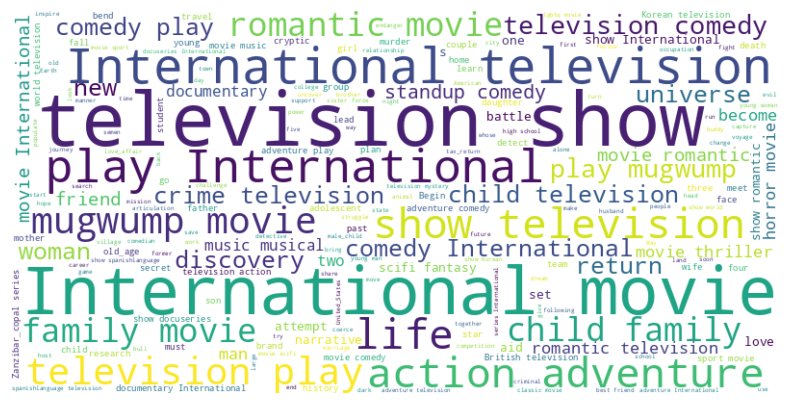

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'new_data' is your dataset with a 'combined_text' column
combined_text = " ".join(new_data['combined_text'])  # Combine all text from the 'combined_text' column

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [95]:
# Manipulate Features to minimize feature correlation and create new features
new_data.head()

show_id  title           director  \
0      s1     3%        Not Mention   
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                       combined_text  type_encoded  \
0  International television show television play ...           1.0   
1  play International movie lay_waste_to earthqua...           0.0   
2  horror movie International movie army recruit ...           0.0   
3  action adventure mugwump movie scifi fantasy p...           0.0   
4  play brilliant group student become cardcounti...           0.0   

   country_encoded  rating_encoded  ...   yu  yuppie  zach  zack  zany  \
0              6.0             8.0  ...  0.0     0.0   0.0   0.0   0.0   
1             37.0             8.0  ...  0.0     0.0   0.0   0.0   0.0   
2             54.0             5.0  ...  0.0     0.0   0.0   0.0   0.0   
3             67.0             4.0  ...  0.0     0.0   0.0   0.0   0.0   
4             67.0             4.0  ...  0.0     0.0   0.0   0.0   0.0   

   zanzibar_copal  zealand  zoe  zombi  zone  
0             0.0      0.0  0.0    0.0   0.0  
1             0.0      0.0  0.0    0.0   0.0  
2             0.0      0.0  0.0    0.0   0.0  
3             0.0      0.0  0.0    0.0   0.0  
4             0.0      0.0  0.0    0.0   0.0  

[5 rows x 5015 columns]

#### 2. Feature Selection

In [96]:
# Select your features wisely to avoid overfitting
no_transformed_data = new_data.iloc[:,7:]
no_transformed_data

type_encoded  country_encoded  rating_encoded  seasons  minutes  \
0              1.0              6.0             8.0      4.0      0.0   
1              0.0             37.0             8.0      0.0     93.0   
2              0.0             54.0             5.0      0.0     78.0   
3              0.0             67.0             4.0      0.0     80.0   
4              0.0             67.0             4.0      0.0    123.0   
...            ...              ...             ...      ...      ...   
7765           0.0             38.0             8.0      0.0     89.0   
7766           1.0             18.0            11.0      1.0      0.0   
7767           1.0             45.0             9.0      1.0      0.0   
7768           0.0             45.0             6.0      0.0    126.0   
7769           0.0             26.0             6.0      0.0    154.0   

      added_month  added_day  added_year  aaron  abandon  ...   yu  yuppie  \
0             8.0       14.0      2020.0    0.0      0.0  ...  0.0     0.0   
1            12.0       23.0      2016.0    0.0      0.0  ...  0.0     0.0   
2            12.0       20.0      2018.0    0.0      0.0  ...  0.0     0.0   
3            11.0       16.0      2017.0    0.0      0.0  ...  0.0     0.0   
4             1.0        1.0      2020.0    0.0      0.0  ...  0.0     0.0   
...           ...        ...         ...    ...      ...  ...  ...     ...   
7765         12.0       13.0      2019.0    0.0      0.0  ...  0.0     0.0   
7766         12.0        1.0      2017.0    0.0      0.0  ...  0.0     0.0   
7767         12.0       15.0      2016.0    0.0      0.0  ...  0.0     0.0   
7768         10.0        1.0      2018.0    0.0      0.0  ...  0.0     0.0   
7769         12.0       15.0      2019.0    0.0      0.0  ...  0.0     0.0   

      zach  zack  zany  zanzibar_copal  zealand  zoe  zombi  zone  
0      0.0   0.0   0.0             0.0      0.0  0.0    0.0   0.0  
1      0.0   0.0   0.0             0.0      0.0  0.0    0.0   0.0  
2      0.0   0.0   0.0             0.0      0.0  0.0    0.0   0.0  
3      0.0   0.0   0.0             0.0      0.0  0.0    0.0   0.0  
4      0.0   0.0   0.0             0.0      0.0  0.0    0.0   0.0  
...    ...   ...   ...             ...      ...  ...    ...   ...  
7765   0.0   0.0   0.0             0.0      0.0  0.0    0.0   0.0  
7766   0.0   0.0   0.0             0.0      0.0  0.0    0.0   0.0  
7767   0.0   0.0   0.0             0.0      0.0  0.0    0.0   0.0  
7768   0.0   0.0   0.0             0.0      0.0  0.0    0.0   0.0  
7769   0.0   0.0   0.0             0.0      0.0  0.0    0.0   0.0  

[7753 rows x 5008 columns]

In [97]:
# # Select your features wisely to avoid overfitting
# no_transformed_data = new_data.iloc[:,7:]
# no_transformed_data

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [98]:
# Apply log transformation to all columns
log_transformed_data = np.log1p(no_transformed_data)

In [99]:
log_transformed_data.head()

type_encoded  country_encoded  rating_encoded   seasons   minutes  \
0      0.693147         1.945910        2.197225  1.609438  0.000000   
1      0.000000         3.637586        2.197225  0.000000  4.543295   
2      0.000000         4.007333        1.791759  0.000000  4.369448   
3      0.000000         4.219508        1.609438  0.000000  4.394449   
4      0.000000         4.219508        1.609438  0.000000  4.820282   

   added_month  added_day  added_year  aaron  abandon  ...   yu  yuppie  zach  \
0     2.197225   2.708050    7.611348    0.0      0.0  ...  0.0     0.0   0.0   
1     2.564949   3.178054    7.609367    0.0      0.0  ...  0.0     0.0   0.0   
2     2.564949   3.044522    7.610358    0.0      0.0  ...  0.0     0.0   0.0   
3     2.484907   2.833213    7.609862    0.0      0.0  ...  0.0     0.0   0.0   
4     0.693147   0.693147    7.611348    0.0      0.0  ...  0.0     0.0   0.0   

   zack  zany  zanzibar_copal  zealand  zoe  zombi  zone  
0   0.0   0.0             0.0      0.0  0.0    0.0   0.0  
1   0.0   0.0             0.0      0.0  0.0    0.0   0.0  
2   0.0   0.0             0.0      0.0  0.0    0.0   0.0  
3   0.0   0.0             0.0      0.0  0.0    0.0   0.0  
4   0.0   0.0             0.0      0.0  0.0    0.0   0.0  

[5 rows x 5008 columns]

### 6. Data Scaling

In [100]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler

# Initialize the Min-Max scaler
scaler = MinMaxScaler()


# Apply scaling to the selected columns
scaled_data = scaler.fit_transform(log_transformed_data)

scaled_data.shape

(7753, 5008)

In [101]:
import pandas as pd

# Assuming "scaled_data" is your NumPy array
# Create a DataFrame from the NumPy array
scaled_data = pd.DataFrame(scaled_data)

# Now, "df" is a Pandas DataFrame containing your data.
scaled_data.head()

0         1         2         3         4         5         6         7     \
0   1.0  0.452110  0.832579  0.568061  0.000000  0.803545  0.726723  0.923306   
1   0.0  0.845151  0.832579  0.000000  0.790660  1.000000  0.896241  0.616148   
2   0.0  0.931058  0.678939  0.000000  0.760406  1.000000  0.848079  0.769803   
3   0.0  0.980354  0.609853  0.000000  0.764757  0.957238  0.771866  0.692994   
4   0.0  0.980354  0.609853  0.000000  0.838864  0.000000  0.000000  0.923306   

   8     9     ...  4998  4999  5000  5001  5002  5003  5004  5005  5006  5007  
0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 5008 columns]

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

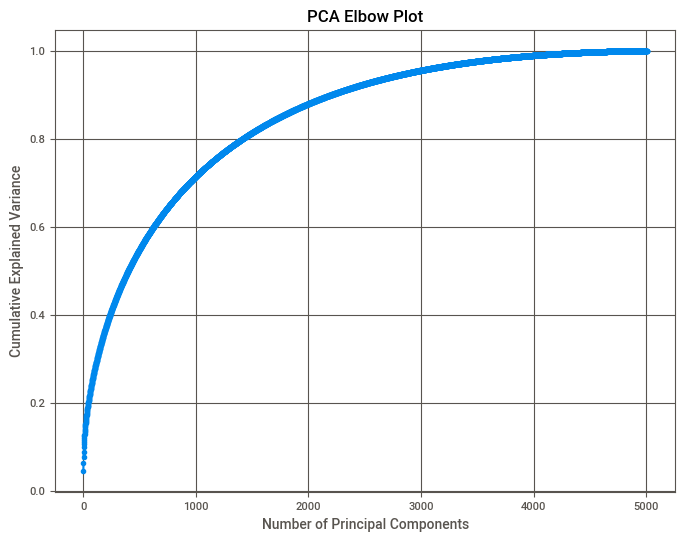

In [102]:
# DImensionality Reduction (If needed)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize a PCA instance without specifying the number of components
pca = PCA()

# Fit the PCA model to your standardized data
pca.fit(scaled_data)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create an elbow plot to visualize the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Elbow Plot')
plt.grid()
plt.show()

In [103]:
# Create a PCA instance and specify the number of components you want to retain
# For example, if you want to retain 10 components, set n_components=10
n_components = 2500
pca = PCA(n_components=n_components)

# Fit the PCA model to your standardized data and transform it
transformed_data_pca = pca.fit_transform(scaled_data)

# The variable 'transformed_data_pca' now contains your data in the reduced-dimensional space with 'n_components' principal components.

# You can also access explained variance to see how much variance is explained by each component
explained_variance = pca.explained_variance_ratio_

In [104]:
# the variances of the pca that we extract and there importance in predicting the output
explained_variance

array([4.50532421e-02, 1.68820817e-02, 1.49344058e-02, ...,
       6.50419023e-05, 6.48882665e-05, 6.47580433e-05])

In [105]:
#calculating the total of  explained_variance  which needs to be more than 90%
explained_variance.sum()

0.9226092500985037

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [106]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = transformed_data_pca

In [107]:
X.shape

(7753, 2500)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [106]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [123]:
# Import necessary libraries
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Step 1: Distance Metric and Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_clustering.fit(X)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

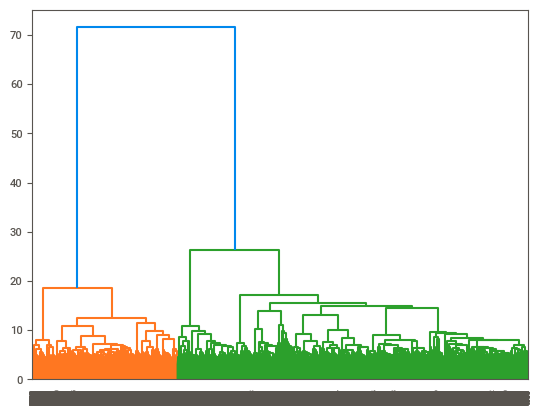

In [124]:
# Import necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 2: Dendrogram
# Generate linkage matrix 'Z' and then plot the dendrogram
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.show()

In [125]:
# Step 3 : Cut Dendrogram and Assign Labels
# Choose a height to cut the dendrogram and obtain clusters
# For example, cut_height = 100
cut_height = 10
labels = agg_clustering.fit_predict(X)

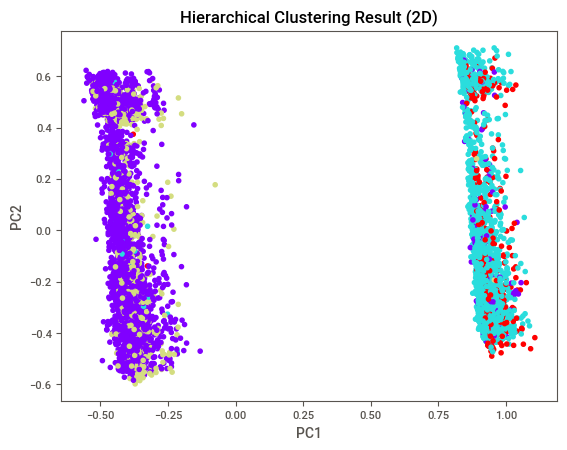

In [126]:
import matplotlib.pyplot as plt

# Assuming PC1 and PC2 are the first two principal components
PC1 = X[:, 0]
PC2 = X[:, 1]

plt.scatter(PC1, PC2, c=labels, cmap='rainbow')
plt.title('Hierarchical Clustering Result (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

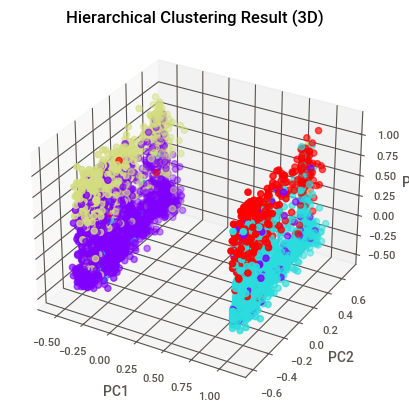

In [127]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have three principal components PC1, PC2, and PC3
PC1 = X[:, 0]
PC2 = X[:, 1]
PC3 = X[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PC1, PC2, PC3, c=labels, cmap='rainbow')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Hierarchical Clustering Result (3D)')
plt.show()


In [128]:
# Step 4: Evaluate the Clustering
silhouette_score_value = silhouette_score(X, labels)
calinski_harabasz_score_value = calinski_harabasz_score(X, labels)
print("Silhouette Score:", silhouette_score_value)
print("Calinski-Harabasz Score:", calinski_harabasz_score_value)

Silhouette Score: 0.0034009202133104643
Calinski-Harabasz Score: 140.7035534051954


The Silhouette Score and Calinski-Harabasz Score are both used to evaluate the quality of a clustering solution:

1. **Silhouette Score**: The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a higher score indicates that the object is better matched to its own cluster and worse matched to neighboring clusters.

   In your case, you have a Silhouette Score of approximately -0.005, which is very close to 0. This suggests that the clustering solution is not well-defined. The data points in your clusters may not be well separated from one another, or the number of clusters may not be appropriate for the data.

2. **Calinski-Harabasz Score (Variance Ratio Criterion)**: The Calinski-Harabasz Score measures the ratio of between-cluster variance to within-cluster variance. A higher score indicates better-defined clusters.

   Your Calinski-Harabasz Score is approximately 65.07. The interpretation of this score depends on the context, but generally, a higher score suggests more distinct and well-separated clusters. However, it's essential to consider the scale and the problem's specific requirements. A higher Calinski-Harabasz Score is not always better; it depends on the problem you are trying to solve.

In this case, it seems that the clustering may not be very well-defined based on the Silhouette Score being close to 0. You might want to consider different clustering techniques, preprocessing steps, or adjust the number of clusters to potentially improve the results. Additionally, domain knowledge can be valuable in understanding and interpreting the clustering quality.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [129]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, make_scorer

# Define a range of linkage methods and number of clusters to explore
param_grid = {
    'linkage': ['ward', 'complete'],  # List of linkage methods
    'n_clusters': [4,5,6]  # Range of number of clusters to try
}

# Create the AgglomerativeClustering model
agg_clustering = AgglomerativeClustering()

# Step 2: Hyperparameter Tuning with Silhouette Score
# Define a custom scoring function using silhouette_score
scorer = make_scorer(silhouette_score)
grid_search = GridSearchCV(agg_clustering, param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:")
print(best_params)

# Step 3: Fit the Model with Best Parameters
best_estimator.fit(X)

# Step 4: Assign Cluster Labels
labels = best_estimator.labels_

# Step 5: Evaluate the Clustering
silhouette_score_value = silhouette_score(X, labels)
print("Best Silhouette Score:", silhouette_score_value)

Best Parameters:
{'linkage': 'ward', 'n_clusters': 4}
Best Silhouette Score: 0.0034009202133104643


In [130]:
labels

array([1, 0, 0, ..., 1, 2, 0])

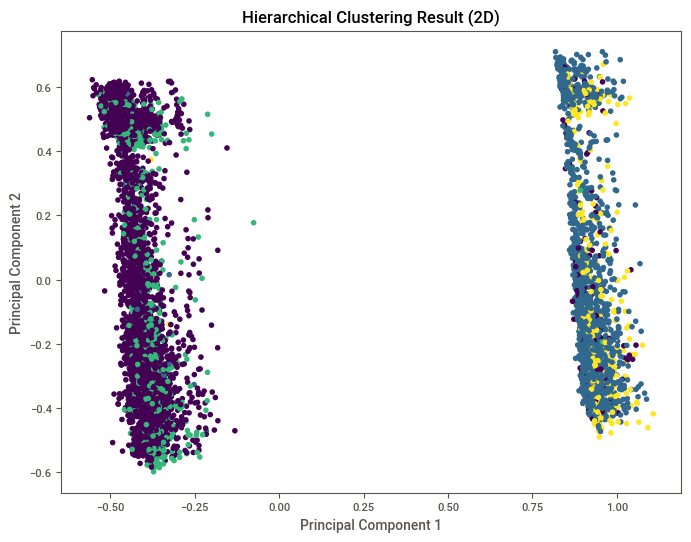

In [131]:
# Step 5: 2D Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Hierarchical Clustering Result (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

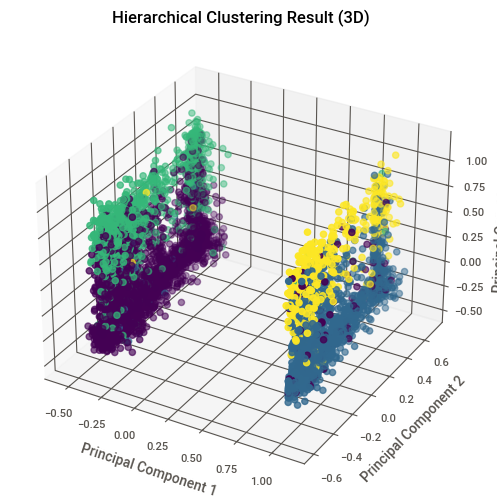

In [132]:
# Step 6: 3D Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis')
ax.set_title('Hierarchical Clustering Result (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [133]:
new_data.head()

show_id  title           director  \
0      s1     3%        Not Mention   
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                       combined_text  type_encoded  \
0  International television show television play ...           1.0   
1  play International movie lay_waste_to earthqua...           0.0   
2  horror movie International movie army recruit ...           0.0   
3  action adventure mugwump movie scifi fantasy p...           0.0   
4  play brilliant group student become cardcounti...           0.0   

   country_encoded  rating_encoded  ...   yu  yuppie  zach  zack  zany  \
0              6.0             8.0  ...  0.0     0.0   0.0   0.0   0.0   
1             37.0             8.0  ...  0.0     0.0   0.0   0.0   0.0   
2             54.0             5.0  ...  0.0     0.0   0.0   0.0   0.0   
3             67.0             4.0  ...  0.0     0.0   0.0   0.0   0.0   
4             67.0             4.0  ...  0.0     0.0   0.0   0.0   0.0   

   zanzibar_copal  zealand  zoe  zombi  zone  
0             0.0      0.0  0.0    0.0   0.0  
1             0.0      0.0  0.0    0.0   0.0  
2             0.0      0.0  0.0    0.0   0.0  
3             0.0      0.0  0.0    0.0   0.0  
4             0.0      0.0  0.0    0.0   0.0  

[5 rows x 5015 columns]

In [134]:
# Select your features wisely to avoid overfitting
data_with_clusters_label = new_data.iloc[:,:15
                                        ]
data_with_clusters_label

show_id                     title           director  \
0         s1                        3%        Not Mention   
1         s2                      7:19  Jorge Michel Grau   
2         s3                     23:59       Gilbert Chan   
3         s4                         9        Shane Acker   
4         s5                        21     Robert Luketic   
...      ...                       ...                ...   
7765   s7766                 Zero Hour   Robert O. Peters   
7766   s7767              Zig & Sharko        Not Mention   
7767   s7768        Zindagi Gulzar Hai        Not Mention   
7768   s7769  Zindagi Kitni Haseen Hay      Anjum Shahzad   
7769   s7770  Zindagi Na Milegi Dobara        Zoya Akhtar   

                                                   cast  \
0     João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3     Elijah Wood, John C. Reilly, Jennifer Connelly...   
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                                                 ...   
7765  Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...   
7766                                            No cast   
7767  Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...   
7768  Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...   
7769  Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7765                    International Movies, Thrillers   
7766                              Kids' TV, TV Comedies   
7767  International TV Shows, Romantic TV Shows, TV ...   
7768      Dramas, International Movies, Romantic Movies   
7769             Comedies, Dramas, International Movies   

                                            description  \
0     In a future where the elite inhabit an island ...   
1     After a devastating earthquake hits Mexico Cit...   
2     When an army recruit is found dead, his fellow...   
3     In a postapocalyptic world, rag-doll robots hi...   
4     A brilliant group of students become card-coun...   
...                                                 ...   
7765  After his father passes, the heir to a retail ...   
7766  Zig, an island-bound hyena, will do anything t...   
7767  Strong-willed, middle-class Kashaf and carefre...   
7768  Two young parents struggle to keep their marri...   
7769  Three friends on an adventurous road trip/bach...   

                                          combined_text  type_encoded  \
0     International television show television play ...           1.0   
1     play International movie lay_waste_to earthqua...           0.0   
2     horror movie International movie army recruit ...           0.0   
3     action adventure mugwump movie scifi fantasy p...           0.0   
4     play brilliant group student become cardcounti...           0.0   
...                                                 ...           ...   
7765  International movie thriller father base_on_ba...           0.0   
7766  child television television comedy zigzag isla...           1.0   
7767  International television show romantic televis...           1.0   
7768  play International movie romantic movie two yo...           0.0   
7769  comedy play International movie three friend a...           0.0   

      country_encoded  rating_encoded  seasons  minutes  added_month  \
0                 6.0             8.0      4.0      0.0          8.0   
1                37.0             8.0      0.0     93.0         12.0   
2                54.0             5.0      0.0     7

In [135]:
import pandas as pd

# Assuming 'data_with_clusters_label' is your dataset
data_with_clusters_label['cluster_label'] = labels

# Now, your dataset includes a new column 'cluster_label' with cluster assignments

# You can print the updated dataset to verify
data_with_clusters_label


show_id                     title           director  \
0         s1                        3%        Not Mention   
1         s2                      7:19  Jorge Michel Grau   
2         s3                     23:59       Gilbert Chan   
3         s4                         9        Shane Acker   
4         s5                        21     Robert Luketic   
...      ...                       ...                ...   
7765   s7766                 Zero Hour   Robert O. Peters   
7766   s7767              Zig & Sharko        Not Mention   
7767   s7768        Zindagi Gulzar Hai        Not Mention   
7768   s7769  Zindagi Kitni Haseen Hay      Anjum Shahzad   
7769   s7770  Zindagi Na Milegi Dobara        Zoya Akhtar   

                                                   cast  \
0     João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3     Elijah Wood, John C. Reilly, Jennifer Connelly...   
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                                                 ...   
7765  Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...   
7766                                            No cast   
7767  Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...   
7768  Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...   
7769  Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7765                    International Movies, Thrillers   
7766                              Kids' TV, TV Comedies   
7767  International TV Shows, Romantic TV Shows, TV ...   
7768      Dramas, International Movies, Romantic Movies   
7769             Comedies, Dramas, International Movies   

                                            description  \
0     In a future where the elite inhabit an island ...   
1     After a devastating earthquake hits Mexico Cit...   
2     When an army recruit is found dead, his fellow...   
3     In a postapocalyptic world, rag-doll robots hi...   
4     A brilliant group of students become card-coun...   
...                                                 ...   
7765  After his father passes, the heir to a retail ...   
7766  Zig, an island-bound hyena, will do anything t...   
7767  Strong-willed, middle-class Kashaf and carefre...   
7768  Two young parents struggle to keep their marri...   
7769  Three friends on an adventurous road trip/bach...   

                                          combined_text  type_encoded  \
0     International television show television play ...           1.0   
1     play International movie lay_waste_to earthqua...           0.0   
2     horror movie International movie army recruit ...           0.0   
3     action adventure mugwump movie scifi fantasy p...           0.0   
4     play brilliant group student become cardcounti...           0.0   
...                                                 ...           ...   
7765  International movie thriller father base_on_ba...           0.0   
7766  child television television comedy zigzag isla...           1.0   
7767  International television show romantic televis...           1.0   
7768  play International movie romantic movie two yo...           0.0   
7769  comedy play International movie three friend a...           0.0   

      country_encoded  rating_encoded  seasons  minutes  added_month  \
0                 6.0             8.0      4.0      0.0          8.0   
1                37.0             8.0      0.0     93.0         12.0   
2                54.0             5.0      0.0     7

In [136]:
# Assuming 'data_with_clusters_label' is your dataset with the 'cluster_label' column
unique_labels = data_with_clusters_label['cluster_label'].unique()

# 'unique_labels' will contain an array of all unique cluster labels

# Print the unique cluster labels
print(unique_labels)


[1 0 3 2]


In [137]:
# Assuming 'data_with_clusters_label' is your dataset with the 'cluster_label' column
cluster_1_data = data_with_clusters_label[data_with_clusters_label['cluster_label'] == 1]

# 'cluster_3_data' now contains all the data points with cluster label 3

# You can print or work with 'cluster_3_data' as needed
cluster_1_data.head()


show_id                                title     director  \
0       s1                                   3%  Not Mention   
5       s6                                   46  Serdar Akar   
16     s17                               Feb-09  Not Mention   
24     s25  ​SAINT SEIYA: Knights of the Zodiac  Not Mention   
26     s27                             (Un)Well  Not Mention   

                                                 cast  \
0   João Miguel, Bianca Comparato, Michel Gomes, R...   
5   Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...   
16  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...   
24  Bryson Baugus, Emily Neves, Blake Shepard, Pat...   
26                                            No cast   

                                            listed_in  \
0   International TV Shows, TV Dramas, TV Sci-Fi &...   
5     International TV Shows, TV Dramas, TV Mysteries   
16                  International TV Shows, TV Dramas   
24               Anime Series, International TV Shows   
26                                         Reality TV   

                                          description  \
0   In a future where the elite inhabit an island ...   
5   A genetics professor experiments with a treatm...   
16  As a psychology professor faces Alzheimer's, h...   
24  Seiya and the Knights of the Zodiac rise again...   
26  This docuseries takes a deep dive into the luc...   

                                        combined_text  type_encoded  \
0   International television show television play ...           1.0   
5   International television show television play ...           1.0   
16  International television show television play ...           1.0   
24  Zanzibar_copal series International television...           1.0   
26  world television docuseries return deep honkyt...           1.0   

    country_encoded  rating_encoded  seasons  minutes  added_month  added_day  \
0               6.0             8.0      4.0      0.0          8.0       14.0   
5              62.0             8.0      1.0      0.0          7.0        1.0   
16             38.0             6.0      1.0      0.0          3.0       20.0   
24             31.0             6.0      2.0      0.0          1.0       23.0   
26             67.0             8.0      1.0      0.0          8.0       12.0   

    added_year  cluster_label  
0       2020.0              1  
5       2017.0              1  
16      2019.0              1  
24      2020.0              1  
26      2020.0              1

In [138]:
# Assuming 'data_with_clusters_label' is your dataset with the 'cluster_label' column
cluster_2_data = data_with_clusters_label[data_with_clusters_label['cluster_label'] == 2]

# 'cluster_3_data' now contains all the data points with cluster label 3

# You can print or work with 'cluster_3_data' as needed
cluster_2_data.head()


show_id             title          director  \
33      s34      #realityhigh  Fernando Lebrija   
39      s40    ¡Ay, mi madre!       Frank Ariza   
46      s47  1 Chance 2 Dance        Adam Deyoe   
68      s69         14 Blades        Daniel Lee   
136    s137      7 Khoon Maaf   Vishal Bhardwaj   

                                                  cast  \
33   Nesta Cooper, Kate Walsh, John Michael Higgins...   
39   Estefanía de los Santos, Secun de la Rosa, Ter...   
46   Lexi Giovagnoli, Justin Ray, Rae Latt, Poonam ...   
68   Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...   
136  Priyanka Chopra, Neil Nitin Mukesh, John Abrah...   

                                    listed_in  \
33                                   Comedies   
39             Comedies, International Movies   
46                    Dramas, Romantic Movies   
68   Action & Adventure, International Movies   
136   Dramas, International Movies, Thrillers   

                                           description  \
33   When nerdy high schooler Dani finally attracts...   
39   When her estranged mother suddenly dies, a wom...   
46   When an aspiring dancer is uprooted during her...   
68   In the age of the Ming Dynasty, Quinglong is t...   
136  Spiced liberally with black comedy, this Bolly...   

                                         combined_text  type_encoded  \
33   comedy nerdy high schooler dani finally attrac...           0.0   
39   comedy International movie estrange mother sud...           0.0   
46   play romantic movie draw_a_bead_on dancer upro...           0.0   
68   action adventure International movie age Ming ...           0.0   
136  play International movie thriller spice libera...           0.0   

     country_encoded  rating_encoded  seasons  minutes  added_month  \
33              67.0             6.0      0.0     99.0          9.0   
39              57.0             8.0      0.0     81.0          7.0   
46              67.0             9.0      0.0     89.0          7.0   
68              39.0             5.0      0.0    113.0          4.0   
136             26.0             8.0      0.0    148.0          8.0   

     added_day  added_year  cluster_label  
33         8.0      2017.0              2  
39        19.0      2019.0              2  
46         1.0      2017.0              2  
68         3.0      2019.0              2  
136        2.0      2018.0              2

In [139]:
# Assuming 'data_with_clusters_label' is your dataset with the 'cluster_label' column
cluster_3_data = data_with_clusters_label[data_with_clusters_label['cluster_label'] == 3]

# 'cluster_3_data' now contains all the data points with cluster label 3

# You can print or work with 'cluster_3_data' as needed
cluster_3_data.head()


show_id                title              director  \
11     s12                 1983           Not Mention   
12     s13                 1994  Diego Enrique Osorno   
38     s39  แผนร้ายนายเจ้าเล่ห์           Not Mention   
45     s46                Şubat           Not Mention   
51     s52   100 Days My Prince           Not Mention   

                                                 cast  \
11  Robert Więckiewicz, Maciej Musiał, Michalina O...   
12                                            No cast   
38  Chutavuth Pattarakampol, Sheranut Yusananda, N...   
45  Alican Yücesoy, Melisa Sözen, Musa Uzunlar, Se...   
51  Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...   

                                            listed_in  \
11  Crime TV Shows, International TV Shows, TV Dramas   
12  Crime TV Shows, Docuseries, International TV S...   
38  International TV Shows, Romantic TV Shows, TV ...   
45  Crime TV Shows, International TV Shows, TV Dramas   
51  International TV Shows, Romantic TV Shows, TV ...   

                                          description  \
11  In this dark alt-history thriller, a naïve law...   
12  Archival video and new interviews examine Mexi...   
38  When two brothers fall for two sisters, they q...   
45  An orphan subjected to tests that gave him sup...   
51  Upon losing his memory, a crown prince encount...   

                                        combined_text  type_encoded  \
11  crime television show International television...           1.0   
12  crime television show docuseries International...           1.0   
38  International television show romantic televis...           1.0   
45  crime television show International television...           1.0   
51  International television show romantic televis...           1.0   

    country_encoded  rating_encoded  seasons  minutes  added_month  added_day  \
11             39.0             8.0      1.0      0.0         11.0       30.0   
12             37.0             8.0      1.0      0.0          5.0       17.0   
38             38.0             6.0      1.0      0.0          3.0       30.0   
45             62.0             8.0      1.0      0.0          1.0       17.0   
51             56.0             6.0      1.0      0.0         12.0        7.0   

    added_year  cluster_label  
11      2018.0              3  
12      2019.0              3  
38      2019.0              3  
45      2017.0              3  
51      2020.0              3

In [140]:
# Assuming 'data_with_clusters_label' is your dataset with the 'cluster_label' column
cluster_0_data = data_with_clusters_label[data_with_clusters_label['cluster_label'] == 0]

# 'cluster_3_data' now contains all the data points with cluster label 3

# You can print or work with 'cluster_3_data' as needed
cluster_0_data.head()


show_id  title           director  \
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   
6      s7    122    Yasir Al Yasiri   

                                                cast  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
6                Horror Movies, International Movies   

                                         description  \
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   
6  After an awful accident, a couple admitted to ...   

                                       combined_text  type_encoded  \
1  play International movie lay_waste_to earthqua...           0.0   
2  horror movie International movie army recruit ...           0.0   
3  action adventure mugwump movie scifi fantasy p...           0.0   
4  play brilliant group student become cardcounti...           0.0   
6  horror movie International movie atrocious acc...           0.0   

   country_encoded  rating_encoded  seasons  minutes  added_month  added_day  \
1             37.0             8.0      0.0     93.0         12.0       23.0   
2             54.0             5.0      0.0     78.0         12.0       20.0   
3             67.0             4.0      0.0     80.0         11.0       16.0   
4             67.0             4.0      0.0    123.0          1.0        1.0   
6             16.0             8.0      0.0     95.0          6.0        1.0   

   added_year  cluster_label  
1      2016.0              0  
2      2018.0              0  
3      2017.0              0  
4      2020.0              0  
6      2020.0              0

In [141]:
print(cluster_0_data.shape)
print(cluster_1_data.shape)
print(cluster_2_data.shape)
print(cluster_3_data.shape)

(4568, 16)
(1896, 16)
(913, 16)
(376, 16)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [109]:
from sklearn.cluster import KMeans

# Create a KMeans model with n_clusters = 4
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model to your data (X is your data)
kmeans.fit(X)

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

In [110]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Assuming you already have 'data_with_clusters_label' with K-Means cluster labels

# Calculate the Silhouette Score
silhouette_score_value = silhouette_score(X, kmeans_labels)

# Calculate the Calinski-Harabasz Score
calinski_harabasz_score_value = calinski_harabasz_score(X, kmeans_labels)

# Print the evaluation metrics
print("Silhouette Score:", silhouette_score_value)
print("Calinski-Harabasz Score:", calinski_harabasz_score_value)

Silhouette Score: 0.023776906304872704
Calinski-Harabasz Score: 185.01854980229632


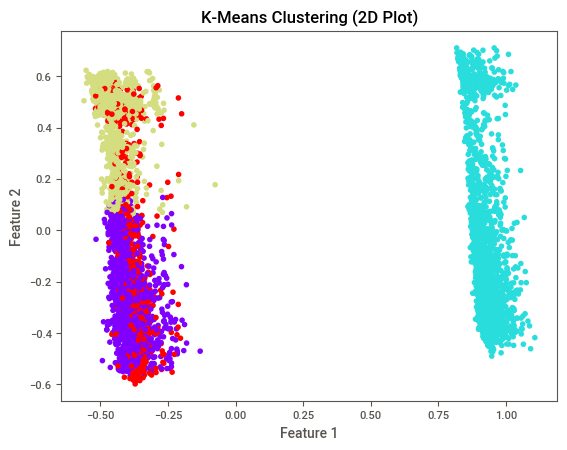

In [111]:
import matplotlib.pyplot as plt

# Create a scatter plot of your data points colored by cluster
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('K-Means Clustering (2D Plot)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [112]:
import plotly.express as px

# Assuming you have 'X' as a NumPy array and 'kmeans_labels' as the K-Means cluster labels
# Replace the indices (0, 1, 2) with the actual feature indices you want to visualize in 3D

# Create a 3D scatter plot of your data points colored by cluster
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=kmeans_labels)
fig.update_traces(marker=dict(size=5))
fig.update_layout(title='K-Means Clustering (3D Plot)')
fig.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

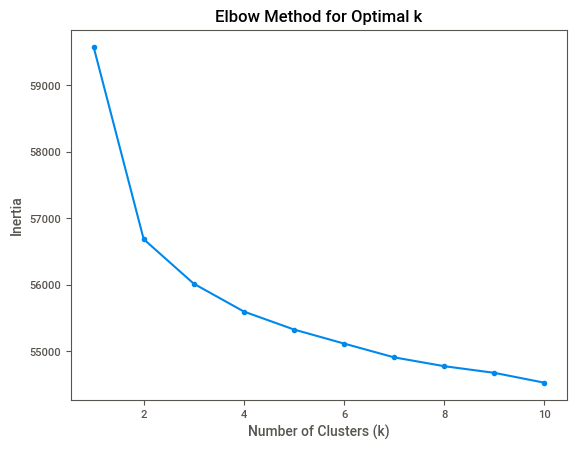

In [115]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Assuming 'X' is your dataset

# Define a range of values for k (number of clusters) to explore
k_values = range(1,11)  # You can adjust the range as needed

# Calculate the inertia (sum of squared distances) for each value of k
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

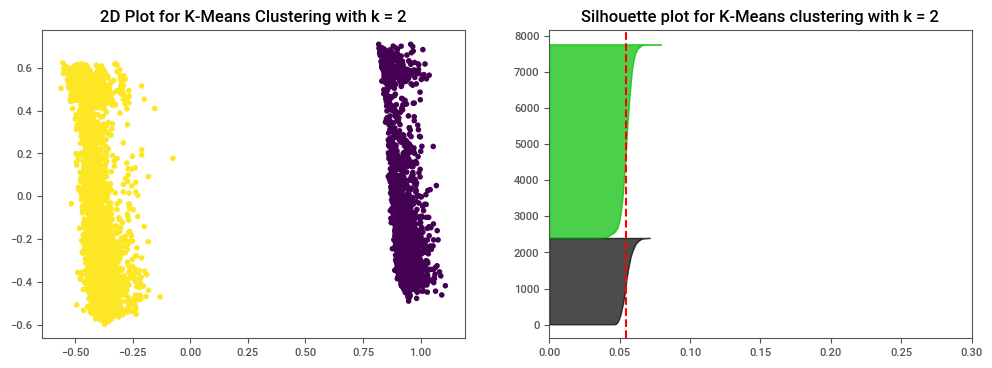

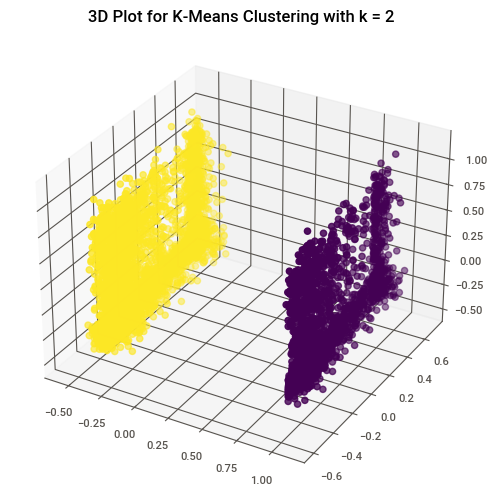

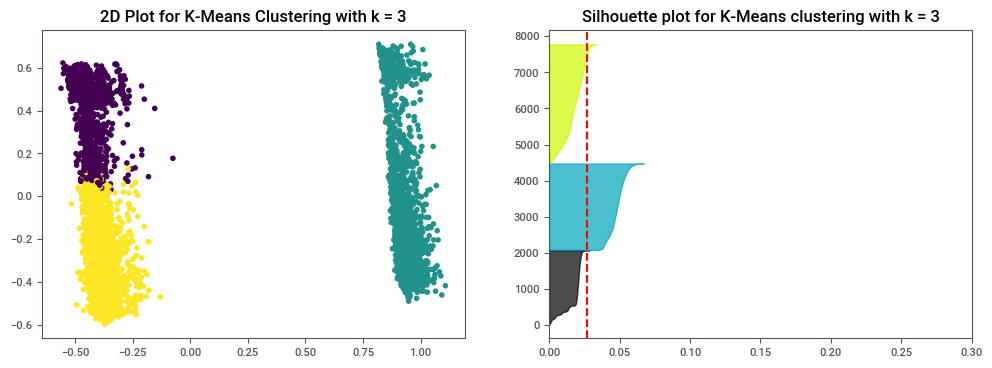

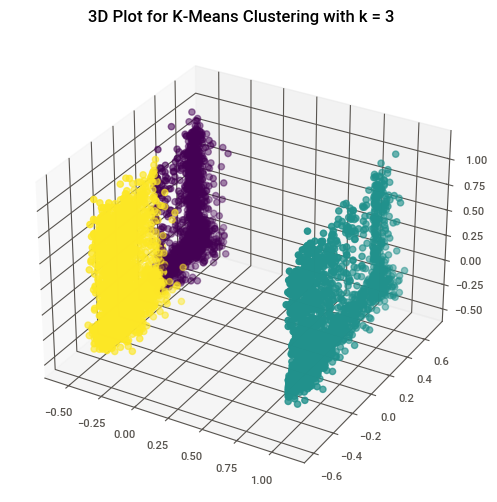

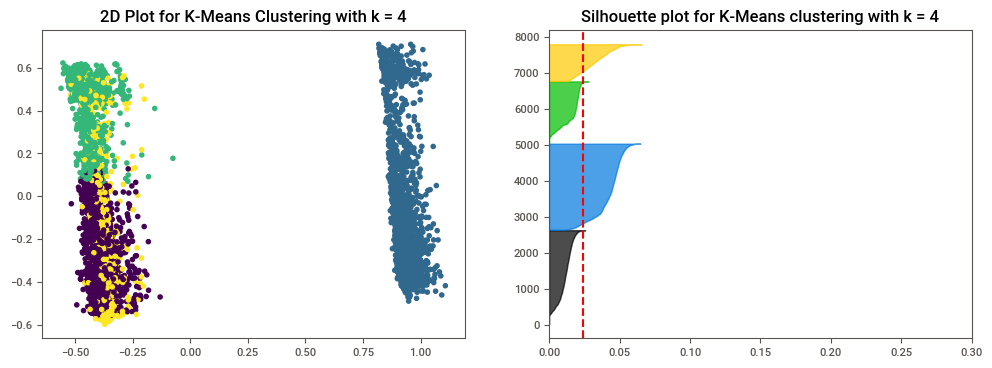

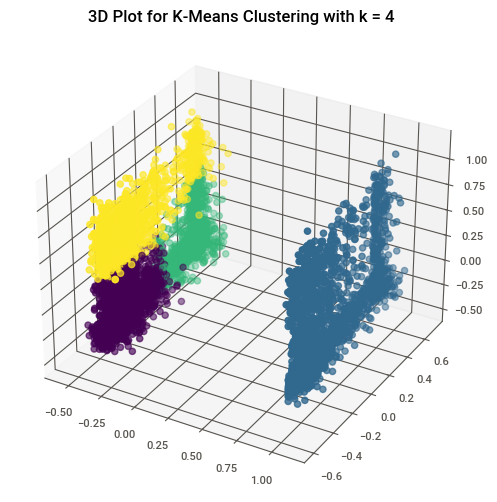

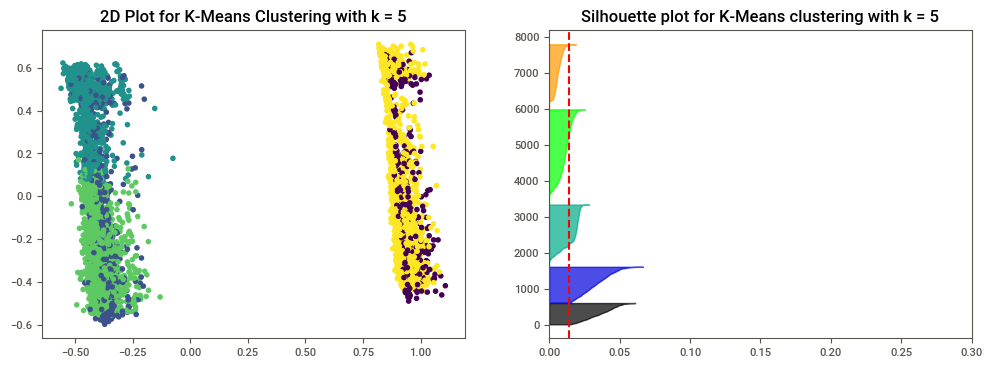

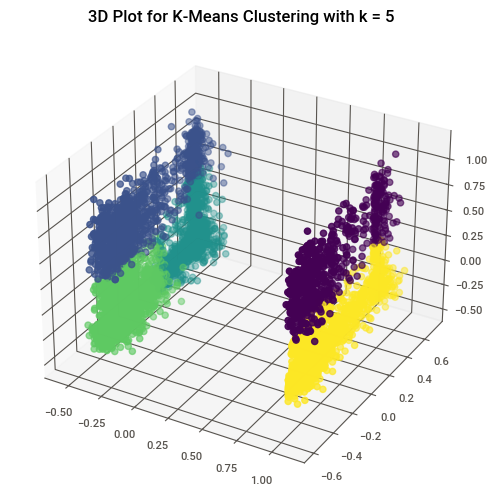

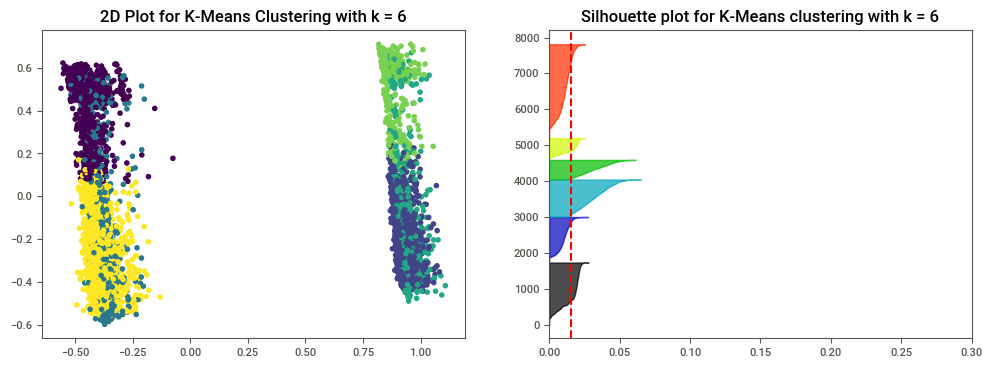

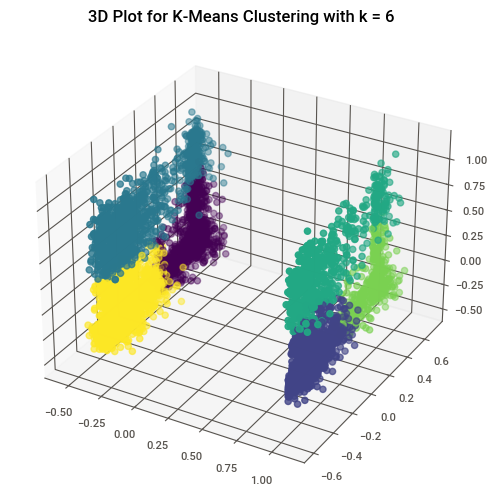

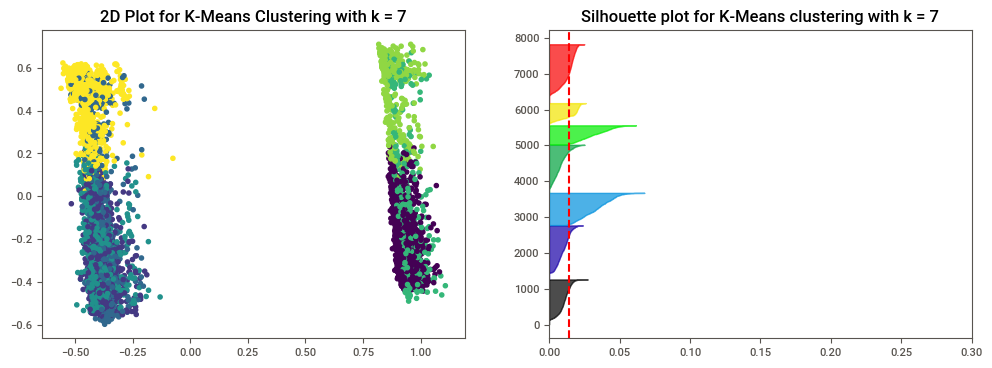

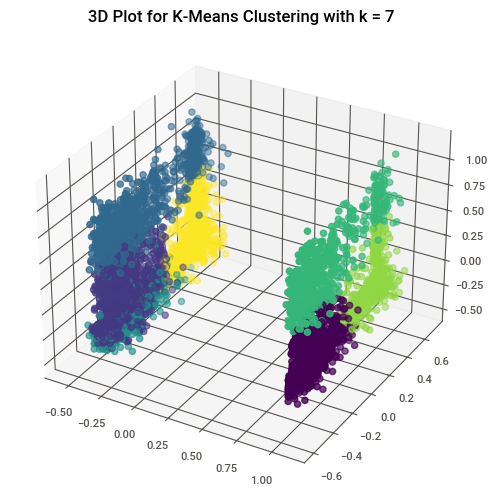

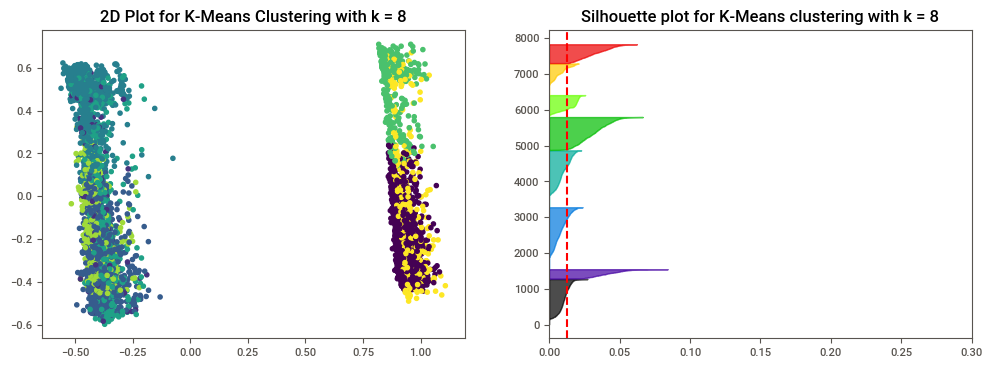

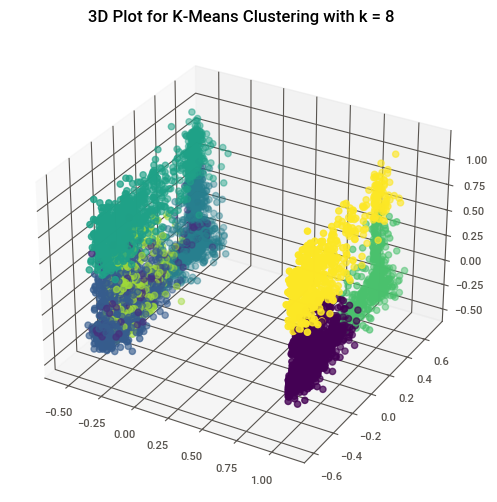

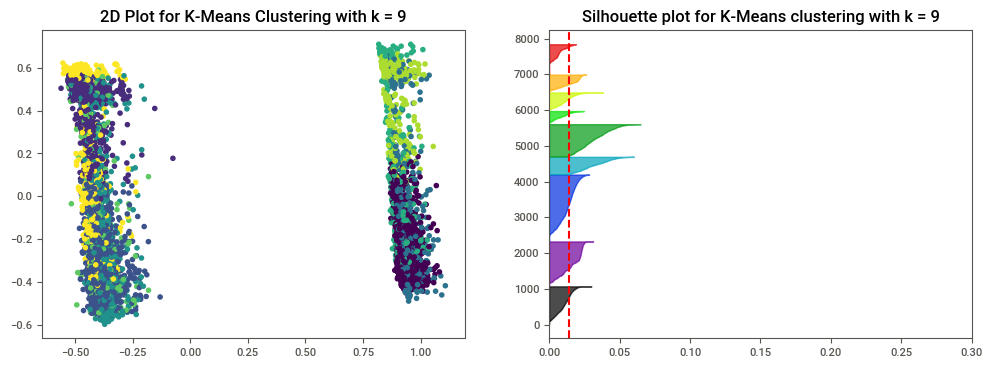

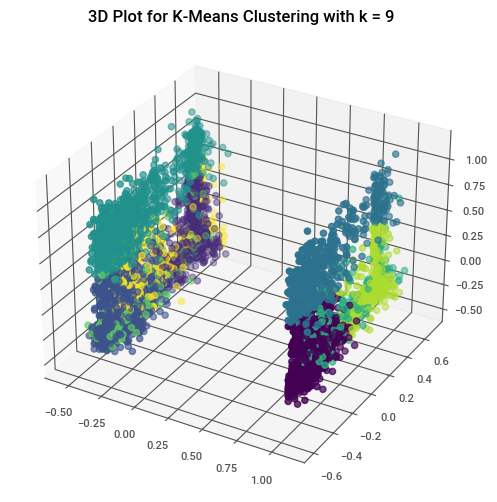

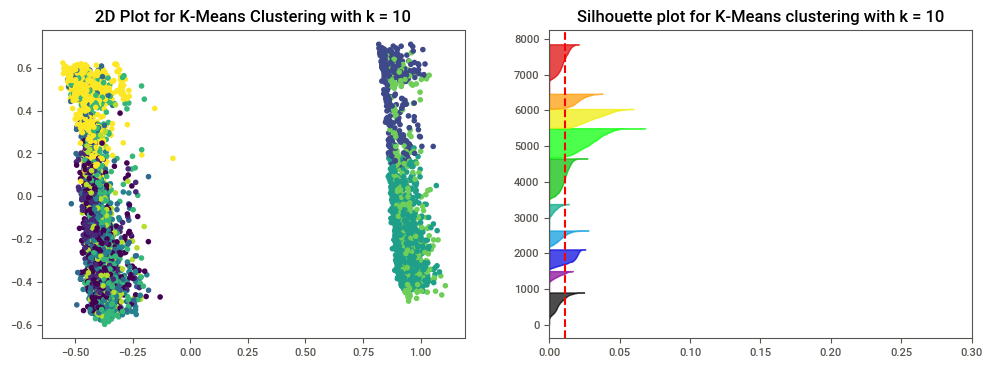

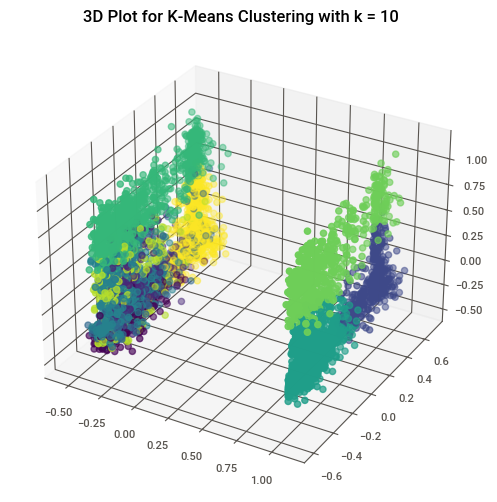

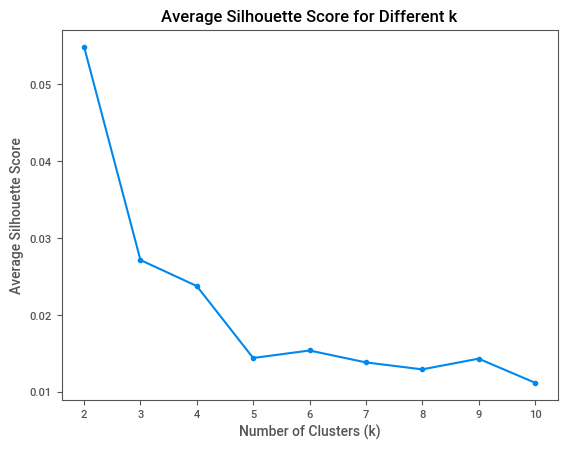

In [122]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

# Assuming 'X' is your dataset
# Define the range of values for k (number of clusters) to explore
k_values = range(2, 11)  # You can adjust the range as needed

# Create an array to store the Silhouette Scores for each k
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate the Silhouette Score for the entire dataset
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Calculate the Silhouette Score for each data point
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Store the average Silhouette Score for this k
    silhouette_scores.append(silhouette_avg)

    # 2D Plot
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.title("2D Plot for K-Means Clustering with k = %d" % k)
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)

    # Create a bar chart to visualize the Silhouette Score for each cluster
    plt.subplot(122)
    plt.title("Silhouette plot for K-Means clustering with k = %d" % k)
    plt.xlim([0, 0.3])  # Set the limits to 0 to 0.3

    y_lower = 10

    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        y_lower = y_upper + 10

    # The vertical line for average Silhouette Score
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show()

    # 3D Plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=cluster_labels)
    ax.set_title("3D Plot for K-Means Clustering with k = %d" % k)

# Plot the Silhouette Scores for different values of k
plt.figure()
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Score for Different k')
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [142]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Create a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust 'eps' and 'min_samples' as needed

# Fit the model to your data
cluster_labels = dbscan.fit_predict(X)  # X is your dataset

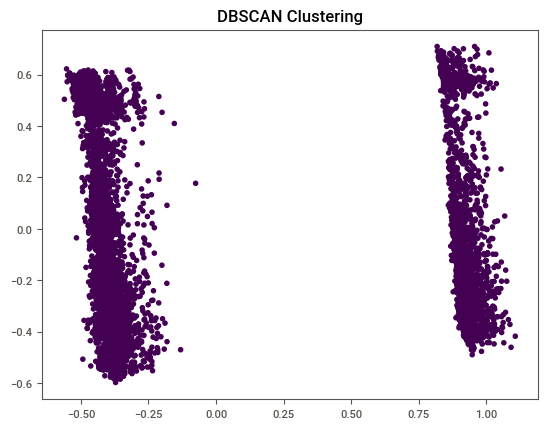

In [144]:
# Visualize the clusters
# Assuming you have 2D data for visualization
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

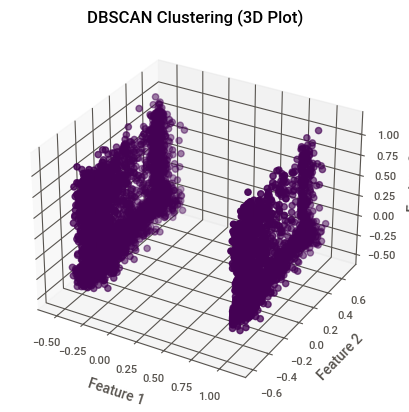

In [145]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust 'eps' and 'min_samples' as needed

# Fit the model to your 3D data
cluster_labels = dbscan.fit_predict(X)  # X is your 3D dataset

# Visualize the clusters in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assuming X has three features (X[:, 0], X[:, 1], X[:, 2])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=cluster_labels, cmap='viridis')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.title('DBSCAN Clustering (3D Plot)')
plt.show()

In [146]:
# Assuming you have already applied DBSCAN and obtained cluster_labels
# cluster_labels = dbscan.fit_predict(X)

# Print the cluster labels
print("Cluster Labels:")
print(cluster_labels)

Cluster Labels:
[-1 -1 -1 ... -1 -1 -1]


In [147]:
import numpy as np

# Assuming you have already applied DBSCAN and obtained cluster_labels
# cluster_labels = dbscan.fit_predict(X)

# Get the unique cluster labels
unique_labels = np.unique(cluster_labels)

# Print the unique cluster labels
print("Unique Cluster Labels:")
print(unique_labels)

Unique Cluster Labels:
[-1]


If you are getting only `[-1]` as the unique cluster label, it means that DBSCAN has labeled all data points as noise or outliers, and it didn't find any dense clusters in your dataset based on the given parameters (`eps` and `min_samples`).

To address this issue, you can adjust the hyperparameters of DBSCAN, specifically the `eps` (maximum distance between two samples for one to be considered as in the neighborhood of the other) and `min_samples` (the number of samples in a neighborhood for a point to be considered as a core point).

Here are some steps you can take:

1. **Adjust Hyperparameters:** Try different values of `eps` and `min_samples` to see if you can identify meaningful clusters. Smaller `eps` values will result in more fine-grained clusters, while larger `eps` values will lead to larger clusters.

2. **Scale the Data:** Ensure that your data is properly scaled, as DBSCAN is sensitive to the scale of features. Standardizing or normalizing your data can make a difference.

3. **Data Inspection:** Review your data to understand its distribution and characteristics. DBSCAN may not perform well on uniformly distributed data or data with varying densities.

4. **Consider Other Clustering Algorithms:** If DBSCAN is not suitable for your data, consider trying other clustering algorithms like K-Means, Agglomerative Hierarchical Clustering, or Gaussian Mixture Models.

5. **Dimension Reduction:** If your dataset has a high dimensionality, consider reducing the dimensionality through techniques like PCA (Principal Component Analysis) before applying clustering algorithms.

By experimenting with these steps and adjusting hyperparameters, you may be able to identify meaningful clusters in your data using DBSCAN or another suitable clustering algorithm.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [149]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import calinski_harabasz_score
import numpy as np

# Create a DBSCAN model
dbscan = DBSCAN()

# Define a range of hyperparameter values to explore
param_grid = {
    'eps': np.linspace(0.1, 1.0),  # Adjust the range of 'eps'
    'min_samples': [5, 10]  # Adjust the values for 'min_samples'
}

# Create GridSearchCV with Calinski-Harabasz Score as the scoring metric
grid_search = GridSearchCV(dbscan, param_grid, scoring='adjusted_rand_score', cv=5, n_jobs=-1)

# Fit the model to your data
grid_search.fit(X)  # X is your dataset

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:")
print(best_params)

Best Parameters:
{'eps': 0.1, 'min_samples': 5}


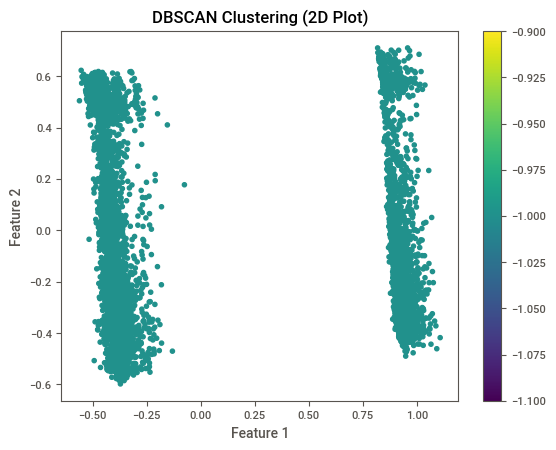

In [151]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already applied DBSCAN with the best parameters and obtained cluster_labels
# cluster_labels = dbscan.fit_predict(X)

# Create a 2D scatter plot of your data points colored by cluster
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')  # Adjust the features (X[:, 0], X[:, 1]) as needed

# Add labels and a colorbar
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering (2D Plot)')
plt.colorbar()

# Show the plot
plt.show()


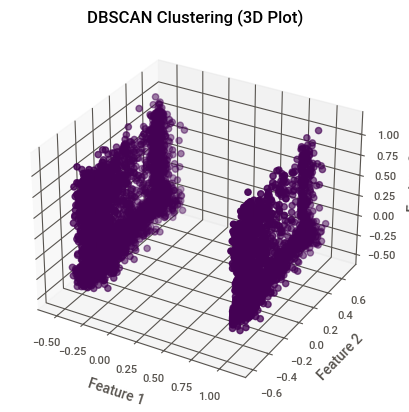

In [152]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have already applied DBSCAN with the best parameters and obtained cluster_labels
# cluster_labels = dbscan.fit_predict(X)

# Create a 3D scatter plot of your data points colored by cluster
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Adjust the features (X[:, 0], X[:, 1], X[:, 2]) as needed
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=cluster_labels, cmap='viridis')

# Add labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('DBSCAN Clustering (3D Plot)')

# Show the plot
plt.show()


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***